In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [3]:
df = pd.read_csv("../../Data/Q4/retail.csv")
df

,Transaction_id,Product_id,Description,Quantity,Date,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009/12/1 7:45,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009/12/1 7:45,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009/12/1 7:45,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009/12/1 7:45,1.25,13085.0
...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Transaction_id  1000000 non-null  object 
 1   Product_id      1000000 non-null  object 
 2   Description     995669 non-null   object 
 3   Quantity        1000000 non-null  float64
 4   Date            1000000 non-null  object 
 5   Price           1000000 non-null  float64
 6   Customer ID     774502 non-null   float64
dtypes: float64(3), object(4)
memory usage: 56.0+ MB


## Statistic

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1000000.000000,1000000.000000,774502.000000
mean,10.053332,4.669050,15325.209913
std,136.005474,125.621421,1694.663838
min,-74215.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15262.000000
75%,10.000000,4.150000,16794.000000
max,74215.000000,38970.000000,18287.000000


In [6]:
df.isna().any()

Transaction_id    True
Product_id        True
Description       True
Quantity          True
Date              True
Price             True
Customer ID       True
dtype: bool

In [7]:
df.dropna(inplace=True, axis=0)

In [9]:
df.describe()

,Quantity,Price,Customer ID
count,774502.000000,774502.000000,774502.000000
mean,12.556811,3.726143,15325.209913
std,144.218012,72.376209,1694.663838
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,5.000000,1.950000,15262.000000
75%,12.000000,3.750000,16794.000000
max,74215.000000,38970.000000,18287.000000


## Visualization

### Customer Purchasing Behavior:
- **Identify the top 10 customers with the highest transaction amounts**
- **Bar chart showing the top customers and their transaction amounts**

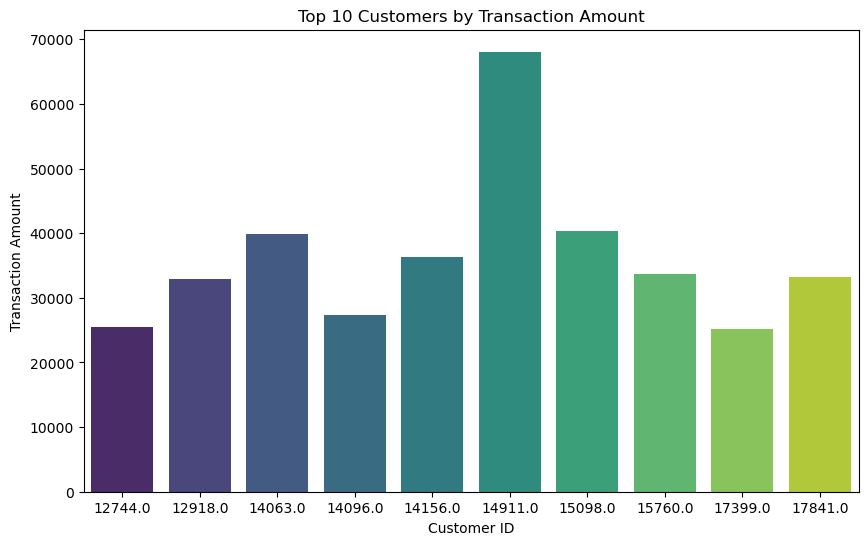

In [10]:
# 1. Customer Purchasing Behavior
top_customers = df.groupby('Customer ID')['Price'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")
plt.title("Top 10 Customers by Transaction Amount")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Amount")
plt.show()

### Product Performance:
- **Determine the best-selling products in terms of quantity**
- **Visualization: Bar chart showing the top-selling products**

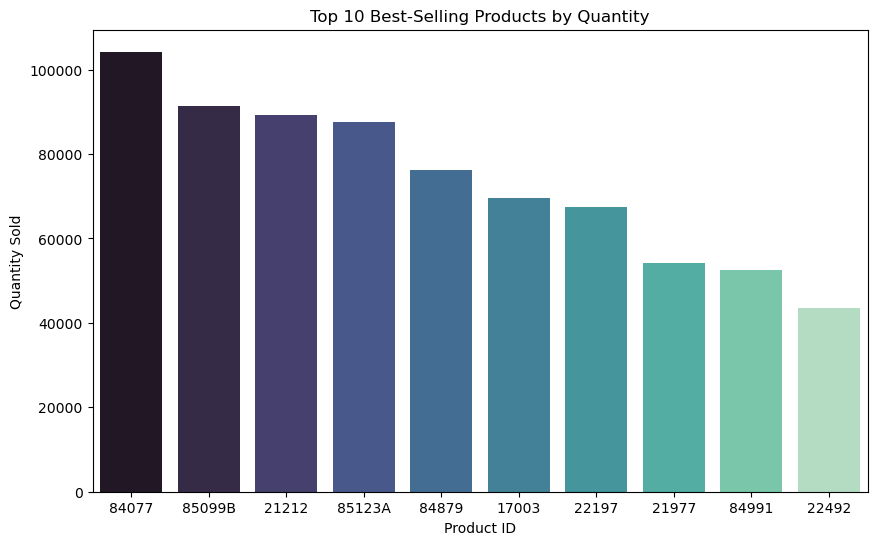

In [14]:
# 2. Product Performance
top_products = df.groupby('Product_id')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="mako")
plt.title("Top 10 Best-Selling Products by Quantity")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.show()

In [8]:
grouped_products = df.groupby('Transaction_id')['Product_id'].apply(list).reset_index(name='items')
grouped_products

,Transaction_id,Product_Group
0,489434,"[85048, 79323P, 79323W, 22041, 21232, 22064, 2..."
1,489435,"[22350, 22349, 22195, 22353]"
2,489436,"[48173C, 21755, 21754, 84879, 22119, 22142, 22..."
3,489437,"[22143, 22145, 22130, 21364, 21360, 21351, 213..."
4,489438,"[21329, 21252, 21100, 21033, 20711, 21410, 214..."
...,...,...
50929,C576670,"[23199, 23344, 23241, 22629, 23238, 22367]"
50930,C576785,"[22356, 23099, 72807C, 37495, 22792]"
50931,C576788,[22762]
50932,C576816,[POST]
